# TFC - 2º entrega intercalar

In [1]:
# limpeza de dados e produçao do datagram
# new : ficar com as 10 cats mais relevantes e retirar empty cats
import csv
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dict = {}
study_groups = {'Music', 'Book', 'DVD'}
dfs = []
dfs_cats = []
dfs_similars = []

def read_archive():
    #archives = "teste.txt"
    archives = "amazon-meta.txt"

    file = open(archives, "r", encoding="UTF-8")
    lines = file.readlines()
    asin = None
    similarities = []
    group = None
    title = None  #--Prof-- cada objeto so tem um titulo, portanto nao ha necessidade de usar uma lista, coloca None
    customer_ids = []
    cats_list = []
    most_frequent_categories = ""


    for line in lines:
        study_line = line.strip()
        #obter o grupo
        if study_line.startswith("group: "):
            group = study_line.split(":")[1].strip()

        #obter id do produto
        if study_line.startswith("ASIN: "):
            asin = study_line.split(":")[1].strip() #--Prof-- colocar .strip()
            similarities = []

        #obter titulo do produto
        if study_line.strip().startswith("title"):
            current_title = line.split(":", 1)[1].strip()
            # Append the title to the array
            title = current_title #--Prof-- title = current_title

        #obter lista de produtos semelhantes
        if study_line.startswith("similar: ") and (group in study_groups):
            similarities = study_line.split()[2:]  #--Prof-- podes simplificar p/ similarities = study_line.split()[2:]
            #--Prof-- remover esta linha, estas a adicionar a lista a ela propria, ficando c/ duplicados
            #--Prof-- remover esta linha

        #obter categorias - 1º retiramos o espaço, 2º retiramos o '|', 3º retiramos os numero identificador da categoria
        if study_line.strip().startswith("|") and (group in study_groups):
            try:
                #obtermos a categoria na posiçao 3 (colocamos 3 no array porque contamos com o espaço)
                category = study_line.strip().split('|')[3] #--Prof-- os nomes aqui podiam estar simplificados, p.e. category em vez de word_in_cats_list e categories em vez de cats_list
                category = category.split("[")[0]
            except:
                category = ""

            cats_list.append(category)

        #obter user id e rating de utilizadores que efetuaram avaliaçoes ao produto
        if study_line.strip() and study_line[0].isdigit() and (group in study_groups):
            parts = line.split()
            user_id = parts[2]
            rating = parts[4]
            customer_ids.append(f"{user_id} - {rating}")

        #quando chegamos ao fim da  informaçao de um dado produto, vamos agregar toda a informaçao ena lista-> organized_lines
        if not study_line and (group in study_groups):
            #começamos por verificar qual a catefgoria que é mais frequente
            #--Prof-- esta linha e redundante (categories=cats_list)
            categories_count = Counter(cats_list)
            if categories_count:
              most_frequent_categories = categories_count.most_common(1)[0][0]
            else:
              most_frequent_categories = ""

            #colocamos a informaçao do produto na lista
            #--Prof-- nao faz sentido colocares as variaveis numa lista se depois
            #precisas dos elementos da lista individualmente como acontece para criares o dic (so estas a complicar a leitura)
            # nao deves criar a lista mas usar as variaveis diretamente para a criacao dos dics
            # e so depois fazes o reset das variaveis
            
            if not similarities:
                similarities = None

            if not most_frequent_categories:
                most_frequent_categories = None

            data_dict = {
                'id': asin, #--Prof-- seguindo a sugestao a cima, ficaria  'id': asin (o mesmo p/ os restantes)
                'group': group.strip("[]").replace("'", ""),
                'title': title,
                'similarities': similarities,
                'categories': most_frequent_categories,
                'reviews': customer_ids
            }
            dfs.append(data_dict)
            
            customer_ids = []
            title = None
            categories = []
            cats_list = []
            group = None

    file.close()


read_archive()
full_dataSet_datagram = pd.DataFrame(dfs)

# Data Processing


In [2]:
#Delete products that do not have a similarity or category associated
full_dataSet_datagram = full_dataSet_datagram.dropna(subset=['similarities'])
full_dataSet_datagram = full_dataSet_datagram.dropna(subset=['categories'])
full_dataSet_datagram

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516528,B000059TOC,DVD,The Drifter,"[630366704X, B0002ERXB8, B0001932ZU, B0001VTPU...",Special Features,[A32PCPZL40G5N8 - 5]
516529,B00006JBIX,DVD,The House Of Morecock,"[B0002HOE6C, B0002I84JO, B00004WZQN, B00069CQ8...",Genres,"[A24IFZUH8NLISK - 1, A2SVXZKU40G7N - 5, A3HM5G..."
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,"[1931709920, 188187110X, 081890643X, 158051046...",Nonfiction,[A2PD80S1N7920J - 4]
516531,B00008DDST,DVD,"1, 2, 3 Soleils: Taha, Khaled, Faudel","[B00012FWNC, B0002UNQQI, B00069FKLO, B0000CNTH...",Genres,"[A3NKS7CVEJVTQ6 - 5, A3EQ4YAZ5OEVK9 - 5, A3HRK..."


<Axes: ylabel='group'>

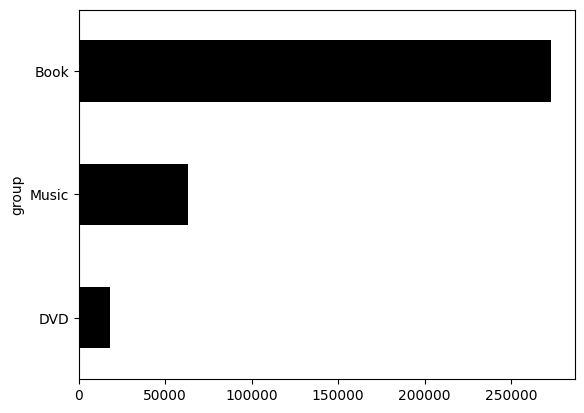

In [3]:
full_dataSet_datagram.groupby('group').size().sort_values().plot(kind='barh', color='black')


In [4]:
#Restringimos o foca às 10 categorias com mais produtos
filtered_data = full_dataSet_datagram[full_dataSet_datagram['categories'] != 'Genres']

top_10_categories = filtered_data['categories'].value_counts().head(10)
top_10_categories

categories
Children's Books           30497
Nonfiction                 23671
Religion & Spirituality    23551
Literature & Fiction       21891
Health, Mind & Body        16708
Business & Investing       14745
Home & Garden              10995
History                    10481
Computers & Internet       10441
Entertainment               9078
Name: count, dtype: int64

In [5]:
unwanted_categories = ['jp-unknown1', 'jp-unknown2', 'jp-unknown3', 'Genres', 'Reference', 'Books on Tape','Book Clubs','Bargain Books','Books on CD',"O'Reilly",
                       'New & Used Textbooks','Home & Office','Boxed Sets','McGraw-Hill','Sheet Music & Scores','Book Accessories','Holiday Greeting Cards','Accessories',
                       'Books, Music & More','Gift Categories','Classical','Camera & Photo','Calendars', 'Libros en español','Foreign Language Books', 'Parenting & Families','Engineering'
                       'Large Print', 'Stephen E. Ambrose', 'Miscellaneous', 'HOWdesign Studio','John Wiley & Sons', 'Opera & Vocal'] 
book = full_dataSet_datagram[full_dataSet_datagram.group == 'Book']
book = book[~book['categories'].isin(unwanted_categories)]
book

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516511,0006176909,Book,House of Cards,"[0006471641, 0006477097, B00009MGGI, 000649799...",Mystery & Thrillers,"[A1MMBWP20WQ2N3 - 5, A3R803J7QXVUI1 - 3, A2FOS..."
516512,0786632550,Book,Mel Bay's Complete Traditional Holiday Season ...,"[079357000X, 0793529395, 0793585031, 0634002066]",Entertainment,"[AR0807T2MTJBL - 4, A2CC70LC14MNT7 - 5, A29TSN..."
516514,4770023286,Book,Sengai: Master Zen Painter,"[4770029446, 1570624895]",Arts & Photography,[AOV39AQYLNIRG - 4]
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,"[0689808747, 0689820305, 0859531821, 006026686...",Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."


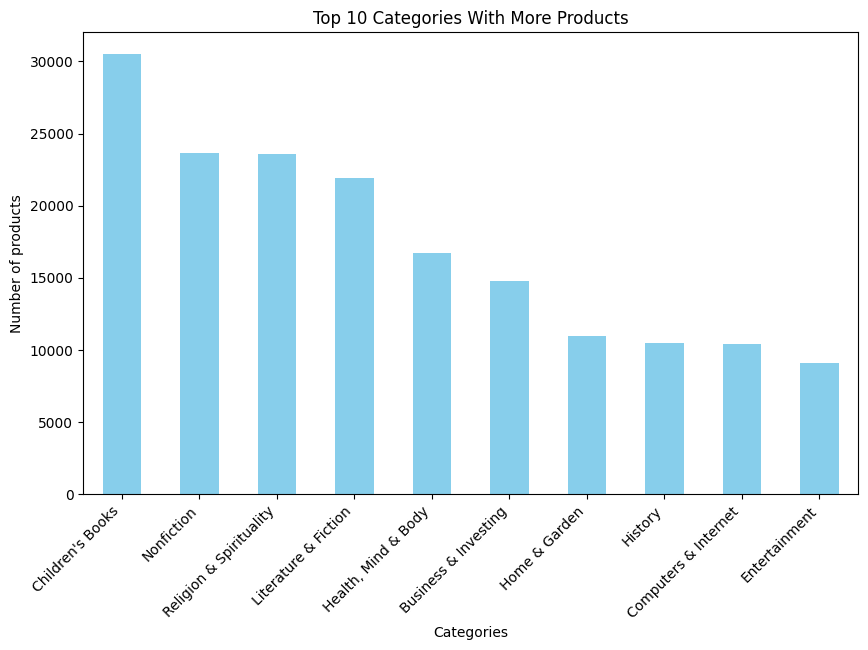

In [246]:
# Cria o gráfico de barras para as 10 categorias mais frequentes (sem 'Genres')
top_10_categories.plot(kind='bar', figsize=(10, 6),color='skyblue')

# Adiciona título e rótulos aos eixos
plt.title('Top 10 Categories With More Products')
plt.xlabel('Categories')
plt.ylabel('Number of products')

# Ajusta os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

# Exibe o gráfico
plt.show()

In [6]:
book_exploded = book.explode('similarities')
book_exploded

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
...,...,...,...,...,...,...
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1931709920,Nonfiction,[A2PD80S1N7920J - 4]
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,188187110X,Nonfiction,[A2PD80S1N7920J - 4]
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,081890643X,Nonfiction,[A2PD80S1N7920J - 4]
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4]


In [7]:
#Vamos ver os Ids das similarities que nao estão na coluna idx e retira-los
#depois queremos saber quantas vezes é que aquelas categorias foram compradas em conjunto
book_exploded = book_exploded[book_exploded['similarities'].isin(book['id'])]
book_exploded

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
...,...,...,...,...,...,...
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0859531821,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0060266864,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0916291820,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4]


In [8]:
count_ids_by_similarities = book_exploded[['id','similarities']].groupby('similarities',as_index=False).count()
count_ids_by_similarities

,similarities,id
0,0001472933,2
1,0001955071,1
2,0002154129,10
3,0002154463,6
4,0002159317,3
...,...,...
152955,9997053060,2
152956,9999366651,2
152957,B00008JYQ3,6
152958,B00008NRHJ,5


In [9]:
mediana = count_ids_by_similarities['id'].median()
largest_count = count_ids_by_similarities['id'].max()
smallest_count = count_ids_by_similarities['id'].min()
print(mediana, largest_count, smallest_count)

3.0 295 1


In [31]:
count_ids_by_similarities['id'].quantile([0.01,0.05,0.1,0.5,0.6,0.75,0.9])

0.01     1.0
0.05     1.0
0.10     1.0
0.50     3.0
0.60     4.0
0.75     6.0
0.90    11.0
Name: id, dtype: float64

# Estudo Categoria-Categoria
--- voltei a fazer todo o processo para esta rede e obtive o mesmo resultado para a rede categoria-categoria ---

In [32]:
#obter as 10 categorias mais frequentes
study_categories = book[['categories','id']].groupby('categories').head(10)
study_categories

,categories,id
0,Religion & Spirituality,0827229534
1,Religion & Spirituality,0738700797
3,Religion & Spirituality,0842328327
4,Religion & Spirituality,1577943082
5,History,0486220125
...,...,...
106886,Large Print,0963894471
135215,Large Print,0786228474
143402,Large Print,0786242892
205305,Pop,1570190100


In [33]:
merged_datagram = pd.merge(book_exploded[['id','categories','similarities']], book[['id','categories']], left_on='similarities', right_on='id', how='left')
#o left  on e tinha categories mas assim ele vai procurar os casos em que book_exploded[categories] e x[id] correspondem
#antes tinha df_exploded que agora é book_exploded
#Logica que usei: quando as book_exploded[similarities]==x[id]

# Select columns for the final datagram
#final_datagram #= merged_datagram[['id', 'categorias', 'similar_id', 'id']]

merged_datagram

,id_x,categories_x,similarities,id_y,categories_y
0,0827229534,Religion & Spirituality,0804215715,0804215715,Religion & Spirituality
1,0827229534,Religion & Spirituality,156101074X,156101074X,Religion & Spirituality
2,0827229534,Religion & Spirituality,0687023955,0687023955,Religion & Spirituality
3,0827229534,Religion & Spirituality,0687074231,0687074231,Religion & Spirituality
4,0827229534,Religion & Spirituality,082721619X,082721619X,Religion & Spirituality
...,...,...,...,...,...
790006,0060537612,Children's Books,0859531821,0859531821,Children's Books
790007,0060537612,Children's Books,0060266864,0060266864,Children's Books
790008,0060537612,Children's Books,0916291820,0916291820,Children's Books
790009,0879736836,Nonfiction,1580510469,1580510469,Religion & Spirituality


In [35]:
merged_datagram[['categories_x', 'categories_y']]

,categories_x,categories_y
0,Religion & Spirituality,Religion & Spirituality
1,Religion & Spirituality,Religion & Spirituality
2,Religion & Spirituality,Religion & Spirituality
3,Religion & Spirituality,Religion & Spirituality
4,Religion & Spirituality,Religion & Spirituality
...,...,...
790006,Children's Books,Children's Books
790007,Children's Books,Children's Books
790008,Children's Books,Children's Books
790009,Nonfiction,Religion & Spirituality


In [36]:
cats_relation = merged_datagram[['categories_x', 'categories_y']].groupby(['categories_x', 'categories_y']).size().reset_index(name='count')

---- Relação entre categorias ----

In [37]:
#cats_relation representa todas as relações existentes entre categorias
#a este ponto cats_relation ainda temos o erro de a-> B como B->A que sumenta erradamente o numero de relações existentes
cats_relation.to_csv('cats_relation.csv')

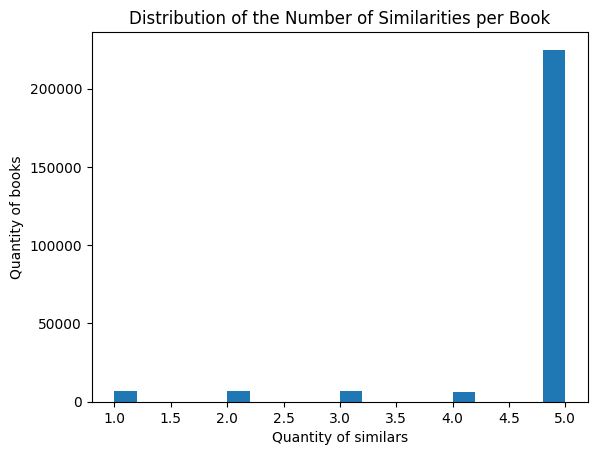

In [261]:
# Conta a quantidade de similaridades
book['similarity_count'] = book['similarities'].apply(len)

book['similarity_count'].plot(kind='hist', bins=20) 

plt.title('Distribution of the Number of Similarities per Book')
plt.xlabel('Quantity of similars')
plt.ylabel('Quantity of books')
plt.show()

# Relação entre categorias nao filtrada
---- cats_relation ainda tem o erro -----

In [19]:
# cats relation não se encontra filtrada 
# considerar só os que são iguais- ver a quantidade - ver a quantidade de generos iguais e compara com o resultado a baixo que só tem diferentes
file_path = 'cats_relation.csv'
study_cats = pd.read_csv(file_path)
study_cats

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Arts & Photography,Biographies & Memoirs,473
2,Arts & Photography,Business & Investing,276
3,Arts & Photography,Children's Books,650
4,Arts & Photography,Comics & Graphic Novels,114
...,...,...,...
714,Travel,Science,249
715,Travel,Science Fiction & Fantasy,1
716,Travel,Sports,504
717,Travel,Teens,2


In [263]:
max_weight = study_cats['Weight'].max()  # Maximum value
min_weight = study_cats['Weight'].min()  # Minimum value
average_weight = study_cats['Weight'].mean()  # Average value

print(max_weight)
print(min_weight)
print(average_weight)

99954
1
1098.7635605006953


<Axes: >

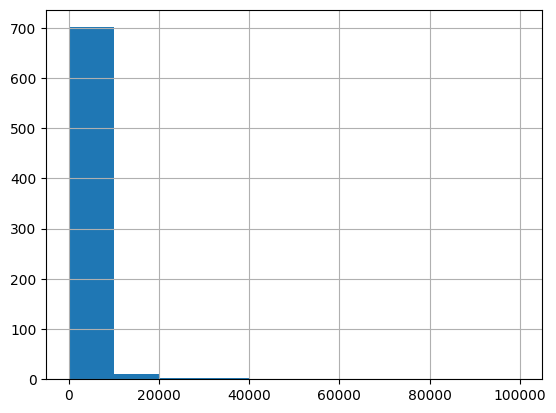

In [264]:
study_cats['Weight'].hist()

# Relação entre categorias filtrada
---- a partir daqui vamos filtrar o datagram das categorias e retirar informação pertinente ao estudo ----

In [21]:
file_path = 'medo.csv'  
medo = pd.read_csv(file_path)
medo

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Arts & Photography,Biographies & Memoirs,473
2,Arts & Photography,Business & Investing,276
3,Arts & Photography,Children's Books,650
4,Arts & Photography,Comics & Graphic Novels,114
...,...,...,...
714,Travel,Science,249
715,Travel,Science Fiction & Fantasy,1
716,Travel,Sports,504
717,Travel,Teens,2


In [265]:
file_path = 'cats_relation.csv'  
df = pd.read_csv(file_path)
df_unfiltered = df[df['Source'] == df['Target']]
df_unfiltered.to_csv('onlySourceTargetEqual_csv_file.csv', index=False)

In [266]:
#Only equal Source Target
file_path = 'onlySourceTargetEqual_csv_file.csv'
unfiltered_cats = pd.read_csv(file_path)
unfiltered_cats 

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Biographies & Memoirs,Biographies & Memoirs,9216
2,Business & Investing,Business & Investing,35711
3,Children's Books,Children's Books,99954
4,Comics & Graphic Novels,Comics & Graphic Novels,5534
5,Computers & Internet,Computers & Internet,29306
6,"Cooking, Food & Wine","Cooking, Food & Wine",14204
7,Engineering,Engineering,4927
8,Entertainment,Entertainment,19480
9,Gay & Lesbian,Gay & Lesbian,620


<Axes: >

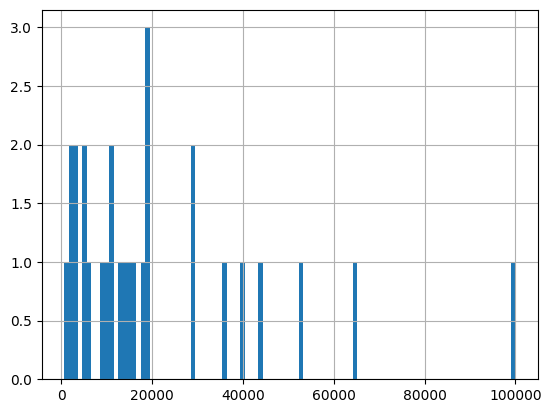

In [267]:
unfiltered_cats['Weight'].hist(bins=100)

In [268]:
max_weight = unfiltered_cats['Weight'].max()  # Maximum value
min_weight = unfiltered_cats['Weight'].min()  # Minimum value
average_weight = unfiltered_cats['Weight'].mean()  # Average value
print(np.quantile(unfiltered_cats['Weight'],0.50))

print(max_weight)
print(min_weight)
print(average_weight)

14667.0
99954
620
21292.464285714286


In [20]:
#products relation - o que estou a fazer aqui é filtrada as categorias iguais que se relacionam A + A = too much 
#ignorar shortCut e fazer longWayfile_path = 'cats_relation.csv'  
df = pd.read_csv('cats_relation.csv')
df_filtered = df[df['Source'] != df['Target']]
df_filtered.to_csv('filtered_csv_file.csv', index=False)

In [42]:
df_filtered

,Source,Target,Weight
1,Arts & Photography,Biographies & Memoirs,473
2,Arts & Photography,Business & Investing,276
3,Arts & Photography,Children's Books,650
4,Arts & Photography,Comics & Graphic Novels,114
5,Arts & Photography,Computers & Internet,198
...,...,...,...
713,Travel,Religion & Spirituality,176
714,Travel,Science,249
715,Travel,Science Fiction & Fantasy,1
716,Travel,Sports,504


In [271]:
file_path = 'filtered_csv_file.csv'
filtered_cats = pd.read_csv(file_path)
 
# para cada linha do ficheiro quero o sorce e o traget de cada linha e apenas dou add
# faço ciclo for, sera que sorce tem o mesmo id que o target no dicionario?

,Source,Target,Weight
0,Arts & Photography,Biographies & Memoirs,473
1,Arts & Photography,Business & Investing,276
2,Arts & Photography,Children's Books,650
3,Arts & Photography,Comics & Graphic Novels,114
4,Arts & Photography,Computers & Internet,198
...,...,...,...
686,Travel,Religion & Spirituality,176
687,Travel,Science,249
688,Travel,Science Fiction & Fantasy,1
689,Travel,Sports,504


<Axes: >

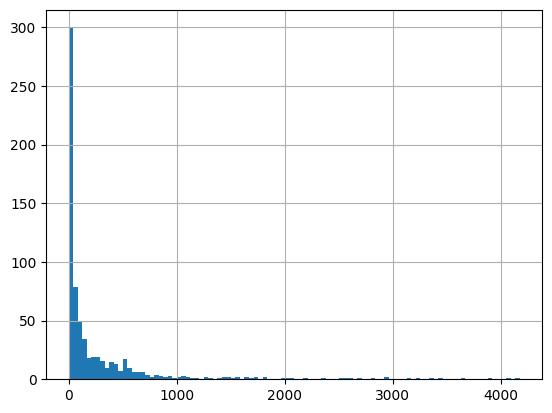

In [272]:
filtered_cats['Weight'].hist(bins=100)

In [132]:
file_path = 'filtered_csv_file.csv'
study_cats = pd.read_csv(file_path)

max_weight = filtered_cats['Weight'].max()  # Maximum value
min_weight = filtered_cats['Weight'].min()  # Minimum value
average_weight = filtered_cats['Weight'].mean()  # Average value


print(np.quantile(filtered_cats['Weight'],0.50))
print(max_weight)
print(min_weight)
print(average_weight)

65.0
4173
1
280.4949348769899


In [145]:
file_path = 'study_relation.csv'
study_products = pd.read_csv(file_path)
study_products.set_index('Id')

,modularity_class
Id,
0231118597,0
B000067D0Y,0
0375727191,0
080148605X,0
1560232579,0
...,...
0465028721,4077
0684835657,4077
0198205287,4077


In [146]:
# O que é a modularidada: usa o id para contar o numero de livros comunidade
study_products.groupby('modularity_class')

In [147]:
study_cats

,Id,modularity_class
0,Arts & Photography,0
1,Biographies & Memoirs,1
2,Business & Investing,2
3,Children's Books,1
4,Comics & Graphic Novels,1
5,Computers & Internet,2
6,"Cooking, Food & Wine",3
7,Engineering,2
8,Entertainment,1
9,Gay & Lesbian,1


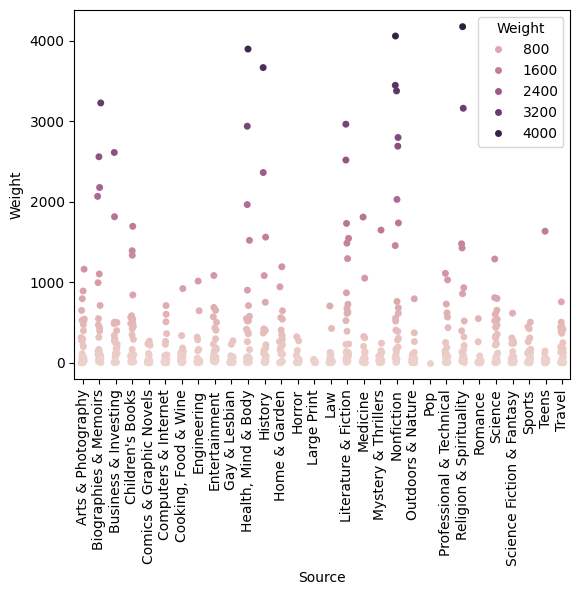

In [149]:
import seaborn as sns

sns.stripplot(data=df_filtered, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

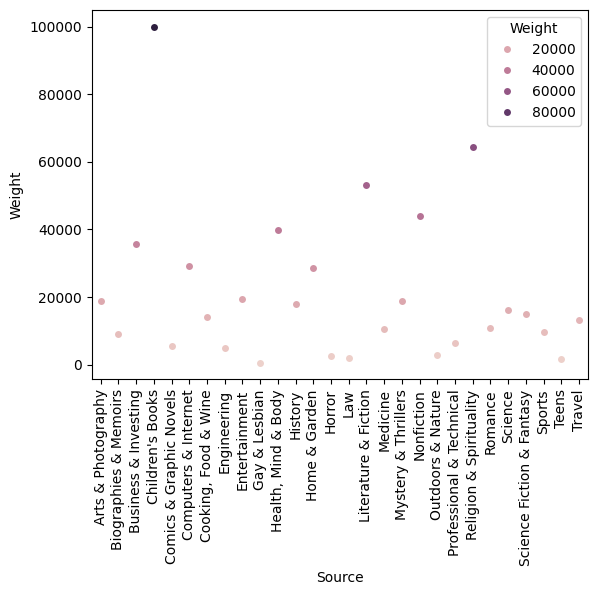

In [150]:
sns.stripplot(data=unfiltered_cats, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

In [151]:
file_path = 'cats_relation.csv'  
original_cats = pd.read_csv(file_path)

original_cats['Genre Relation'] = np.where(original_cats['Source'] == original_cats['Target'],'Same Genre', 'Different Genre')

# Q1 - 

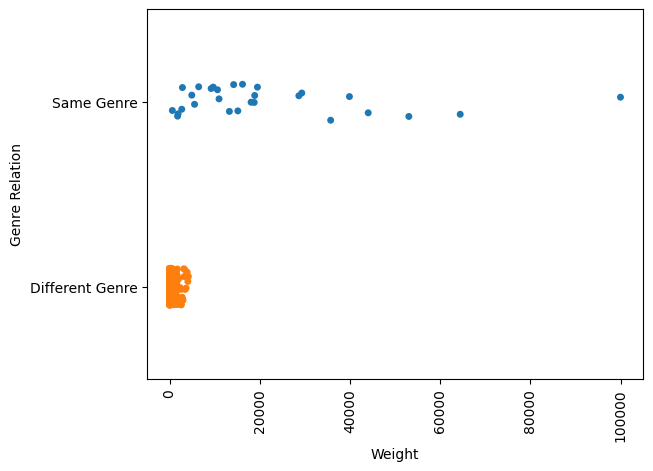

In [152]:
sns.stripplot(data=original_cats, x='Weight', y='Genre Relation', hue='Genre Relation')
plt.xticks(rotation=90)
plt.show()

# Q2 - Que géneros diferentes são frequentemente comprados em conjunto?
--- Vamos normalizar os dados ---

# Relação Produto-Produto

In [153]:
file_path = 'product_relation_modularity.csv'
product_h = pd.read_csv(file_path)

In [154]:
q3 = product_h['modularity_class'].value_counts()
q3

modularity_class
5481    353
2638    304
2231    259
1242    247
4406    238
       ... 
2699      5
5664      5
4726      4
441       3
749       3
Name: count, Length: 5811, dtype: int64

In [155]:
len(q3[q3<=5])

6

<Axes: >

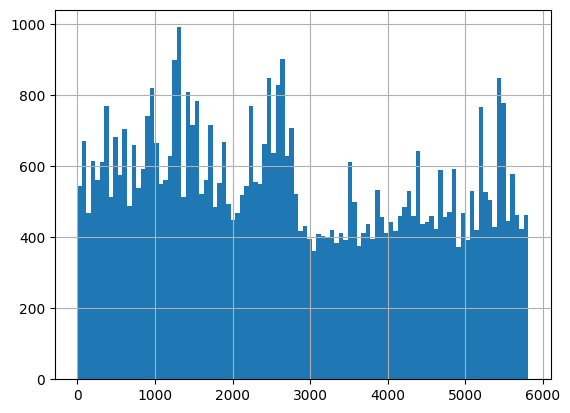

In [156]:
product_h['modularity_class'].hist(bins=100)

In [159]:
book_categories = book['categories'].value_counts()
book_categories

categories
Children's Books             30496
Nonfiction                   23670
Religion & Spirituality      23551
Literature & Fiction         21887
Health, Mind & Body          16707
Business & Investing         14745
Home & Garden                10995
History                      10481
Computers & Internet         10441
Entertainment                 9075
Biographies & Memoirs         9022
Arts & Photography            8999
Science                       8245
Travel                        7083
Mystery & Thrillers           6822
Medicine                      5426
Science Fiction & Fantasy     5401
Cooking, Food & Wine          5209
Sports                        4148
Professional & Technical      4102
Romance                       3833
Engineering                   2774
Comics & Graphic Novels       2216
Outdoors & Nature             1665
Law                           1495
Teens                         1188
Horror                        1146
Gay & Lesbian                  652
Large Pri

In [171]:
#Primeiro vamos passar od dados para um datafram
book_categories_df = book_categories.reset_index()
book_categories_df.columns = ['Category', 'Value']

In [182]:
merged_df = pd.merge(filtered_cats, book_categories_df, left_on='Source', right_on='Category', how='left')
merged_target = pd.merge(merged_df, book_categories_df, left_on='Target', right_on='Category', how='left')
merged_target['Min_value'] = merged_target[['Value_x', 'Value_y']].min(axis=1)
merged_target['Max_value'] = merged_target[['Value_x', 'Value_y']].max(axis=1)
merged_target['Normalized_weight'] = (merged_target['Value_x'] + merged_target['Value_y'])/merged_target['Weight']
merged_target

,Source,Target,Weight,Category_x,Value_x,Category_y,Value_y,Min_value,Max_value,Normalized_weight
0,Arts & Photography,Biographies & Memoirs,473,Arts & Photography,8999,Biographies & Memoirs,9022,8999,9022,38.099366
1,Arts & Photography,Business & Investing,276,Arts & Photography,8999,Business & Investing,14745,8999,14745,86.028986
2,Arts & Photography,Children's Books,650,Arts & Photography,8999,Children's Books,30496,8999,30496,60.761538
3,Arts & Photography,Comics & Graphic Novels,114,Arts & Photography,8999,Comics & Graphic Novels,2216,2216,8999,98.377193
4,Arts & Photography,Computers & Internet,198,Arts & Photography,8999,Computers & Internet,10441,8999,10441,98.181818
...,...,...,...,...,...,...,...,...,...,...
686,Travel,Religion & Spirituality,176,Travel,7083,Religion & Spirituality,23551,7083,23551,174.056818
687,Travel,Science,249,Travel,7083,Science,8245,7083,8245,61.558233
688,Travel,Science Fiction & Fantasy,1,Travel,7083,Science Fiction & Fantasy,5401,5401,7083,12484.000000
689,Travel,Sports,504,Travel,7083,Sports,4148,4148,7083,22.283730


# Q3 - Modelação em rede permite ir além das recomendações quem comprou X também comprou Y?

In [290]:
# Antigo product relation modularity
file_path = 'product_relation_modularity.csv'
product_h = pd.read_csv(file_path)

In [291]:
file_path = 'new_product_relation_modularity.csv'
product_h = pd.read_csv(file_path)

In [292]:
q3 = product_h['modularity_class'].value_counts()
q3

modularity_class
1071    7025
2075    6976
517     6699
1203    6664
924     6510
        ... 
2133       2
2129       2
2127       2
2117       2
3647       2
Name: count, Length: 3648, dtype: int64

In [293]:
len(q3[q3 <= 5])

2385

<Axes: ylabel='Frequency'>

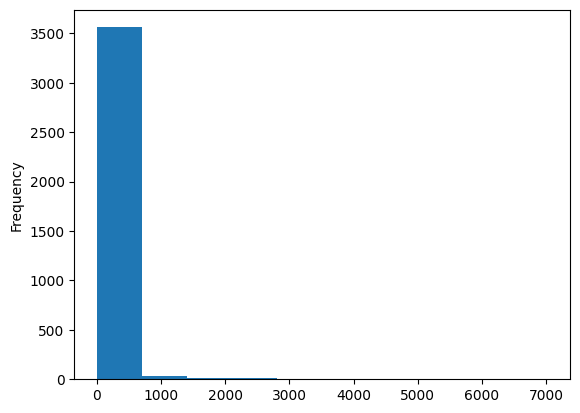

In [294]:
q3.plot(kind='hist')

<Axes: >

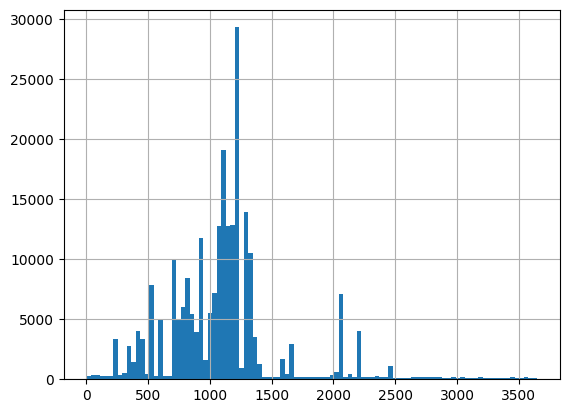

In [295]:
product_h['modularity_class'].hist(bins=100)

# Q4 - Qual a variabilidade de género dentro das comunidades?
--- para cada comunidade obter o género dos livros e contar número de géneros diferentes, bem como a percentagem dominante --- 

In [52]:
#Vamos estudar as comunidades existentes
file_path = 'new_study_cats.csv'
study_cats = pd.read_csv(file_path)
grouped = study_cats.groupby('modularity_class')
for name, group in grouped:
    print(f"Group {name}")
    print(group)
    print("\n") 

Group 0
                          Id  modularity_class
0         Arts & Photography                 0
5       Computers & Internet                 0
7                Engineering                 0
12             Home & Garden                 0
19         Outdoors & Nature                 0
20  Professional & Technical                 0
23                   Science                 0


Group 1
                           Id  modularity_class
3            Children's Books                 1
4     Comics & Graphic Novels                 1
8               Entertainment                 1
9               Gay & Lesbian                 1
13                     Horror                 1
15       Literature & Fiction                 1
17        Mystery & Thrillers                 1
22                    Romance                 1
24  Science Fiction & Fantasy                 1
26                      Teens                 1
28                Large Print                 1
29                        Pop 

# Analise para construção de rede produto-produto
--- a tenho um erro nos dados para a rede produto-produto que gera um grande erro  ---

In [297]:
book_exploded

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
...,...,...,...,...,...,...
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0859531821,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0060266864,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0916291820,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4]


In [10]:
count_ids_by_similarities = book_exploded[['id','similarities']].groupby('similarities',as_index=False).count()
count_ids_by_similarities
#este resultado está muito diferente

,similarities,id
0,0001472933,2
1,0001955071,1
2,0002154129,10
3,0002154463,6
4,0002159317,3
...,...,...
152955,9997053060,2
152956,9999366651,2
152957,B00008JYQ3,6
152958,B00008NRHJ,5


In [11]:
mediana = count_ids_by_similarities['id'].median()
largest_count = count_ids_by_similarities['id'].max()
smallest_count = count_ids_by_similarities['id'].min()
print(mediana, largest_count, smallest_count)
#previamente os resultados eram: 
# 2.0 5 1

3.0 295 1


In [12]:
#10% dos valores são menores ou iguais a 1.0.
count_ids_by_similarities['id'].quantile([0.01,0.05,0.1,0.5,0.6,0.75,0.9])

0.01     1.0
0.05     1.0
0.10     1.0
0.50     3.0
0.60     4.0
0.75     6.0
0.90    11.0
Name: id, dtype: float64

In [301]:
count_no_more_than_2 = count_ids_by_similarities[count_ids_by_similarities['id'] == 60]
len(count_no_more_than_2)

8

In [16]:
restricao = count_ids_by_similarities[count_ids_by_similarities['id'] <= 4]
print(len(restricao))

book_filtrado = book[book['id'].isin(restricao['similarities'].to_list())]

95121


In [17]:
book_exploded_2 = book_filtrado.explode('similarities')
book_exploded_2

,id,group,title,similarities,categories,reviews
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842328130,Religion & Spirituality,[A2591BUPXCS705 - 4]
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0830818138,Religion & Spirituality,[A2591BUPXCS705 - 4]
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842330313,Religion & Spirituality,[A2591BUPXCS705 - 4]
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842328610,Religion & Spirituality,[A2591BUPXCS705 - 4]
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842328572,Religion & Spirituality,[A2591BUPXCS705 - 4]
...,...,...,...,...,...,...
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1931709920,Nonfiction,[A2PD80S1N7920J - 4]
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,188187110X,Nonfiction,[A2PD80S1N7920J - 4]
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,081890643X,Nonfiction,[A2PD80S1N7920J - 4]
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4]


In [18]:
products_network = book_exploded_2[['id','similarities']]
products_network.to_csv('produts_relation.csv')

In [305]:
products_network


,id,similarities
0,0827229534,0804215715
0,0827229534,156101074X
0,0827229534,0687023955
0,0827229534,0687074231
0,0827229534,082721619X
...,...,...
516502,0465028721,0684835657
516502,0465028721,0198205287
516502,0465028721,0521627249
516502,0465028721,0521596491
